The goal of this project is to find a better approach to identify credit defaulters.This is a classification problem where we have to predict whether a loan will be paid by the customer or no 

Below steps had been taken in order to process and analyse the data of the loan dataset.

<ul>
<li><a href="#intro"> 1.Reading the Dataset</a></li>
<li><a href="#assessing">2.Exploratory Data Analysis</a></li>
<li><a href="#predictive">3. Predictive Modeling</a></li>
<li><a href="#conclusion">4. Conclusions</a></li>    
</ul>



## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve,classification_report
from sklearn import preprocessing,metrics,svm,linear_model

## Reading the dataset

There are 3 datasets present. They need to be joined by a common attribute.

-	Borrower Information: Information on the clients’ customers
-	Loan Classification Information: Information on the loan itself
-	Loan Payment Information: Information on the payments on the loans.

Between Borrower and Loan Datasets, the common attribute is "member_id" whereas between Loan and Payment Datasets, the common attribute is "id"

In [2]:
##Reading the dataset
df_borrower = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Borrower Information.csv')
df_borrower.head(3)

,Unnamed: 0,member_id,emp_title,emp_length,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1296599,NaN,10+ years,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1314167,Ryder,< 1 year,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1313524,NaN,10+ years,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [3]:
df_loan = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Classification Information.csv')
df_loan.head(3)

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,issue_d,desc,title,loan_amnt,int_rate,funded_amnt,funded_amnt_inv,installment
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I need to upgra...,Computer,5000,10.65,5000,4975.0,162.87
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,Dec-2011,Borrower added on 12/22/11 > I plan to use t...,bike,2500,15.27,2500,2500.0,59.83
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,Dec-2011,NaN,real estate business,2400,15.96,2400,2400.0,84.33


In [4]:
df_pay = pd.read_csv('C:/Users/sarita.machado/OneDrive - Accenture/Sarita_BEL/myLearning/Projects/Assessment Test/OneDrive_2019-07-04/To be communicated to the candidate/Loan Payment Information.csv')
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Joining Borrower and Loan Datasets on "member_id"
df_inter=pd.merge(df_loan,df_borrower, on="member_id")

In [6]:
df_inter.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,home_ownership,zip_code,addr_state,annual_inc,annual_inc_joint,open_acc,pub_rec,total_acc,delinq_2yrs,earliest_cr_line
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,RENT,860xx,AZ,24000.0,NaN,3.0,0.0,9.0,0.0,Jan-1985
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,RENT,309xx,GA,30000.0,NaN,3.0,0.0,4.0,0.0,Apr-1999
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,RENT,606xx,IL,12252.0,NaN,2.0,0.0,10.0,0.0,Nov-2001


In [7]:
# Joining Intermediate DataSet and Payment Datasets on "id"
df=pd.merge(df_inter,df_pay, on="id")

In [8]:
df_pay.head(3)

,Unnamed: 0,id,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,27.65,1.0,NaN,NaN,13648.0,83.7,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1.00,5.0,NaN,NaN,1687.0,9.4,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,8.72,2.0,NaN,NaN,2956.0,98.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the Size of the Merged Data set

In [10]:
df.shape

(887379, 71)

####  Looking for Columns and their % of null data

In [11]:
pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

,Count,Percent
Unnamed: 0_x,0,0.000000
id,0,0.000000
member_id,0,0.000000
term,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
loan_status,0,0.000000
pymnt_plan,0,0.000000
purpose,0,0.000000
application_type,0,0.000000


In [12]:
df.shape

(887379, 71)

If you take a look, there are atleast 15 columns who have more than 80% of their data as 'NA'. Hence we can drop these rows

In [13]:
df = df.dropna(axis=1, thresh=int(0.80*len(df)))

#### Dropping Duplicates 

In [14]:
df.drop_duplicates(keep='first',inplace=True)

### Looking to drop columns which intuitively wont add value to the prediction

In [15]:
df.head(3)

,Unnamed: 0_x,id,member_id,term,grade,sub_grade,loan_status,pymnt_plan,purpose,application_type,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,1,1077501,1296599,36 months,B,B2,Fully Paid,n,credit_card,INDIVIDUAL,...,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,0.0,NaN,NaN
1,2,1077430,1314167,60 months,C,C4,Charged Off,n,car,INDIVIDUAL,...,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,NaN,NaN
2,3,1077175,1313524,36 months,C,C5,Fully Paid,n,small_business,INDIVIDUAL,...,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,0.0,NaN,NaN


We try to remove features which are highly corelated. Variables which are highly correlated should be removed as they disturb in the process of creating predictive models. Here we remove variables that have correlation of 0.65 and above

In [16]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
df.drop(columns=to_drop, axis=1, inplace=True )
#df.drop(df_numerical[to_drop], axis=1, inplace=True )

In [17]:
df.shape

(887379, 35)

In [18]:
df.dtypes

Unnamed: 0_x                    int64
term                           object
grade                          object
sub_grade                      object
loan_status                    object
pymnt_plan                     object
purpose                        object
application_type               object
issue_d                        object
title                          object
loan_amnt                       int64
int_rate                      float64
emp_title                      object
emp_length                     object
home_ownership                 object
zip_code                       object
addr_state                     object
annual_inc                    float64
open_acc                      float64
pub_rec                       float64
delinq_2yrs                   float64
earliest_cr_line               object
dti                           float64
inq_last_6mths                float64
revol_bal                     float64
revol_util                    float64
total_pymnt 

We remove the columns which wont add much information to our predictive modeling

In [19]:
drop_columns=['Unnamed: 0_x','zip_code','emp_title','addr_state','earliest_cr_line','issue_d','purpose','collections_12_mths_ex_med','last_credit_pull_d','last_pymnt_d','earliest_cr_line','sub_grade','title','pymnt_plan','application_type']
#,'term','dti','emp_length','annual_inc','revol_util','tot_cur_bal','open_acc','pub_rec','delinq_2yrs','tot_coll_amt','acc_now_delinq']
df.drop(columns=drop_columns,axis=1,inplace=True)


#### 5 .Dropping rows which have NA present anywhere within the row.

In [20]:
df.dropna(axis=0,inplace=True)

Removing the word "months" from the data

In [21]:
df['term'] = [x[:2] for x in df['term']]
df['term'] = pd.to_numeric(df['term'],errors='coerce')

Removing the word "years" from the column data

In [22]:
df['emp_length'] = df["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df.emp_length.value_counts()


10    274533
1     114695
2      71501
3      63580
5      49760
4      46663
7      41178
8      41165
6      38592
9      32301
Name: emp_length, dtype: int64

#### This heatmap helps us to validate the fact that our variables that will be used in further analysis are not correlated to each other by > 65%

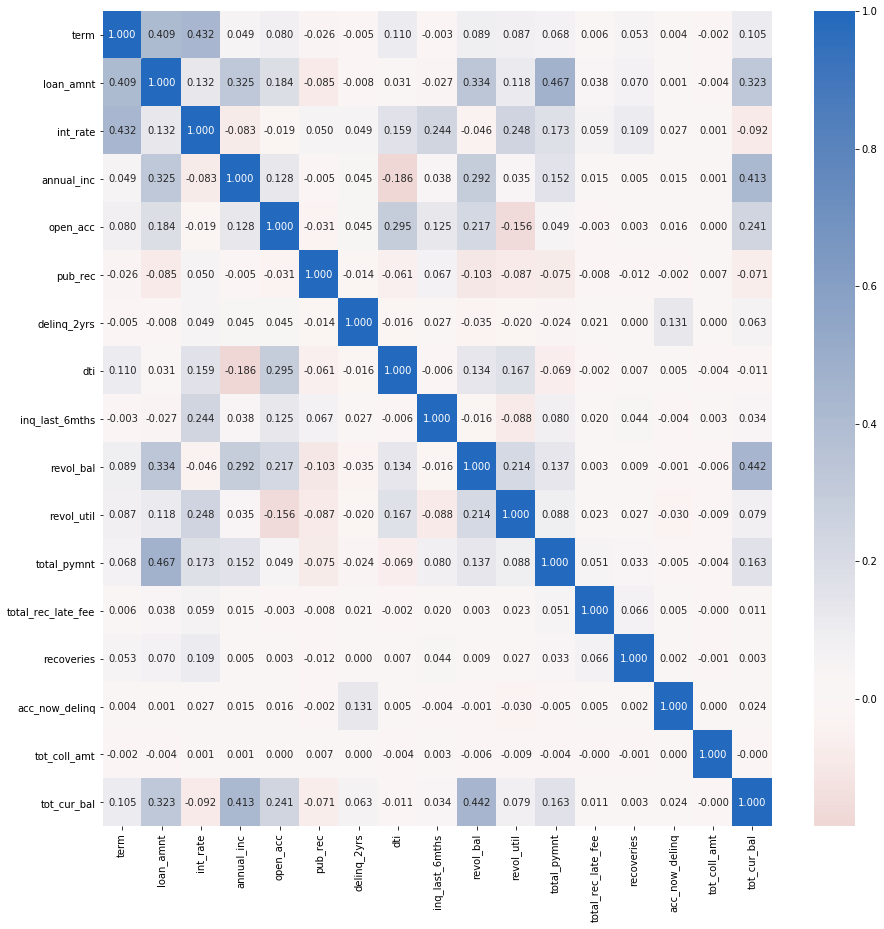

In [23]:
plt.figure(figsize = [15, 15])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

Hence we remove variables that are highly co-related to each other amnf categorical variables

## Distribution of Loan Value Status

In [24]:
df_loanstatus_sliced= df[(df['loan_status']=="Fully Paid") | (df['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
df= df_loanstatus_sliced.replace({"loan_status": di})

0    148065
1     33110
Name: loan_status, dtype: int64

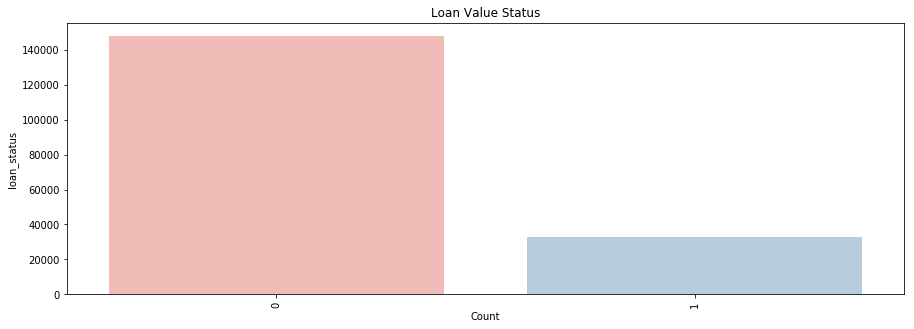

In [25]:
plt.figure(figsize=(15,5))
loan_status=df['loan_status'].value_counts()
sns.barplot(loan_status.index,loan_status,palette='Pastel1')
plt.xlabel('Count')
plt.title("Loan Value Status")
plt.xticks(rotation=90)
loan_status

In [26]:
df['loan_status'].value_counts()
print("Current shape of dataset :",df.shape)
df.head(3)

Current shape of dataset : (181175, 21)


,term,grade,loan_status,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,open_acc,pub_rec,...,dti,inq_last_6mths,revol_bal,revol_util,total_pymnt,total_rec_late_fee,recoveries,acc_now_delinq,tot_coll_amt,tot_cur_bal
42538,3,B,0,12000,13.53,10,RENT,40000.0,7.0,2.0,...,16.94,0.0,5572.0,68.8,13359.770000,0.0,0.0,0.0,15386.0,13605.0
42544,3,B,0,3000,12.85,10,RENT,25000.0,5.0,2.0,...,24.68,0.0,2875.0,54.2,3181.532981,0.0,0.0,0.0,154.0,19530.0
42546,3,A,0,28000,7.62,5,MORTGAGE,325000.0,15.0,0.0,...,18.55,1.0,29581.0,54.6,29150.980000,0.0,0.0,0.0,0.0,799592.0


In [27]:
df.shape

(181175, 21)

#### This heatmap helps us to validate the fact that our variables that will be used in further analysis are not correlated to each other by > 65%

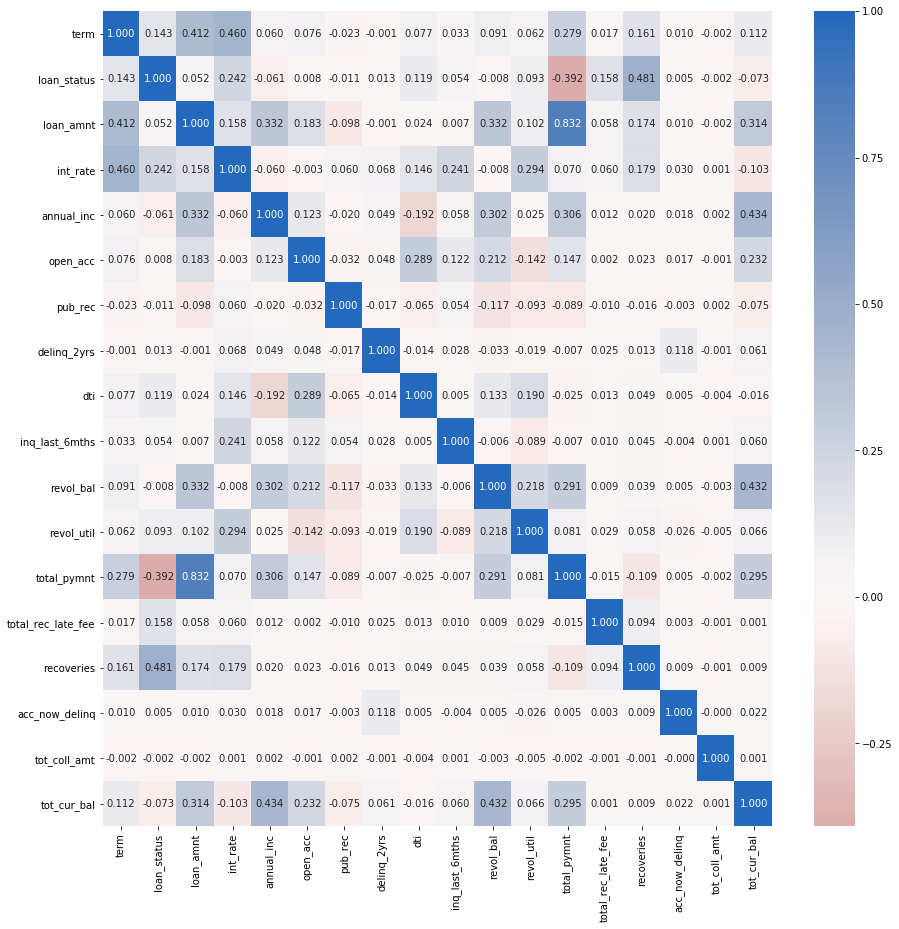

In [28]:
plt.figure(figsize = [15, 15])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

From the above heatmap we can conclude following things:
    
1. Recoveries are highly related to loan status. This is intuitive as well that higher recoveries indicate that the loan will be "Charged off" 
2. total_pymnt is postively related to loan status. This means the total amount paid is a good indication to predict the loan status
3. Interest Rate is negatively related to loan status. This is also well understood higher the interest rate, lower the chances of loan being paid off in time


In [29]:
df.shape

(181175, 21)

Here we try to analyse our independent variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F07DBEDD8>,
      dtype=object)

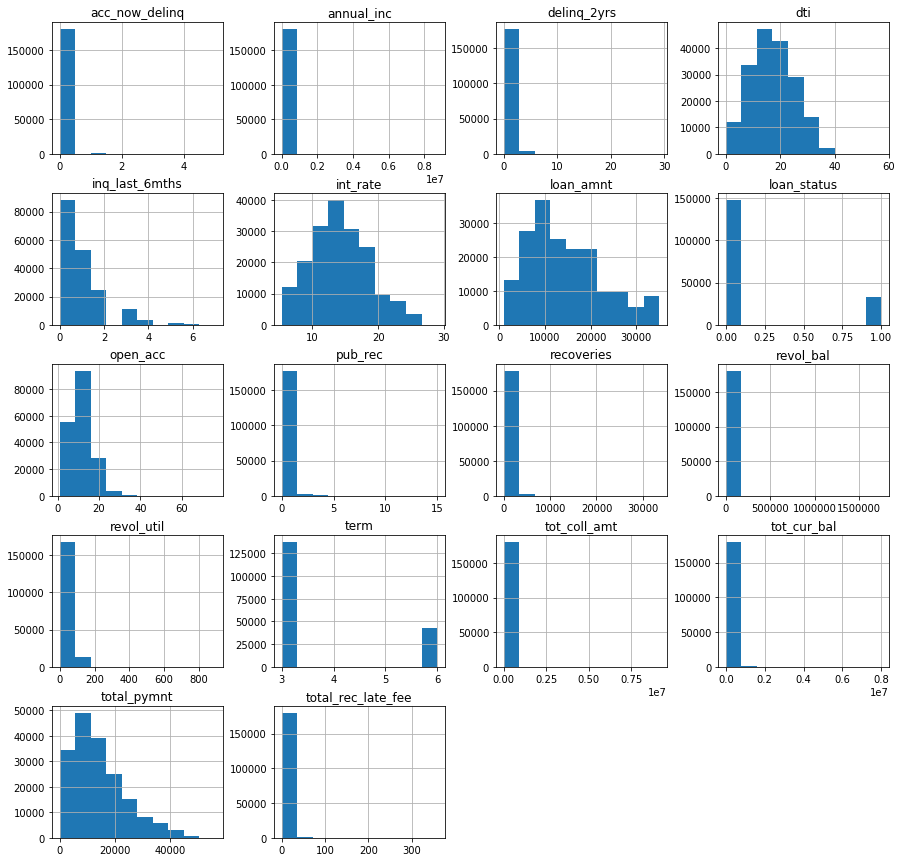

In [30]:
df.hist(figsize=(15,15))

In [31]:
numerical = df.columns[df.dtypes == {'float64','int64'}]
for i in numerical:
    if df[i].min() > 0:
        transformed, lamb = boxcox(df.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df.loc[df[i].notnull(), i] = transformed

<a id='predictive'></a>
### 4)Building Predictive Models

#### 1.Using Box Cox Transformation

We use Box-Cox Transformation inorder to transform the numerical variables into a normal shape


In [32]:
df_string = df.select_dtypes(include ='object') 
#df.drop(columns=df_string, axis=1, inplace=True )
#df.drop(df_numerical,inplace=true )
df_string.dtypes

grade             object
emp_length        object
home_ownership    object
dtype: object

#### 2.One-Hot Encoding

We use one-hot encoding as it a very straight forward one-step procedure to get the dummy variables for categorical features.


In [33]:
df_string = df.select_dtypes(include ='object') 
dummy_grade=pd.get_dummies(df["grade"], prefix="grade")
dummy_ownership=pd.get_dummies(df["home_ownership"], prefix="ownership")
df=df.join(dummy_grade.iloc[:,:])
df=df.join(dummy_ownership.iloc[:,:])
df.drop(columns={'grade','home_ownership'},inplace=True )

Separating the "X" and "y" 

In [34]:
X = df.iloc[:, df.columns != "loan_status"]
y = df["loan_status"]
X_dup = X.copy()

### 4.Splitting the data using scikitlearn's train_test_split and using 70% data for training and 30% for testing

In [35]:
X_train_res, X_test, Y_train_res, Y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)
Y_train_res.value_counts()

0    103645
1     23177
Name: loan_status, dtype: int64

Verifying that the data is split into train and test data

In [36]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=0)

#X_train_res, Y_train_res = rus.fit_resample(X_train, Y_train)
#np.bincount(Y_train_res)

In [37]:
print("X_train is {} ,X_test is {} ,Y_train is {} ,Y_test is {} ".format(X_train_res.shape,X_test.shape,Y_train_res.shape,Y_test.shape))

X_train is (126822, 31) ,X_test is (54353, 31) ,Y_train is (126822,) ,Y_test is (54353,) 


# Building models using all features

Splitting the data using scikitlearn's train_test_split and using 70% data for training and 30% for testing.



#### 5.Defining the confusion matrix

In [38]:
def CMatrix(cm):
    fig, axes = plt.subplots(figsize=(8,6))
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')

## A. Logistic Regression

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


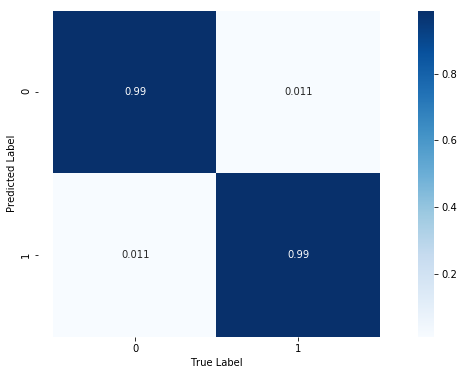

In [39]:
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train_res, Y_train_res)
Y_pred_test = logistic_regression.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## B. Decision Trees

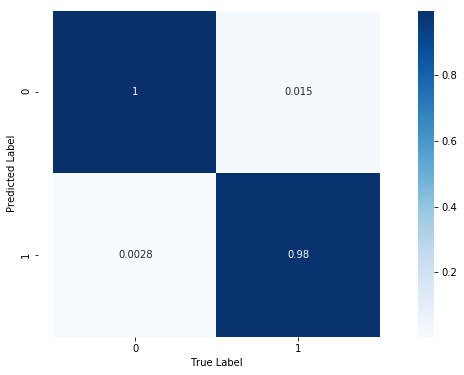

In [40]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)
class_tree.fit(X_train_res, Y_train_res)
Y_pred_test = class_tree.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## C. Naive Bayes Classifier

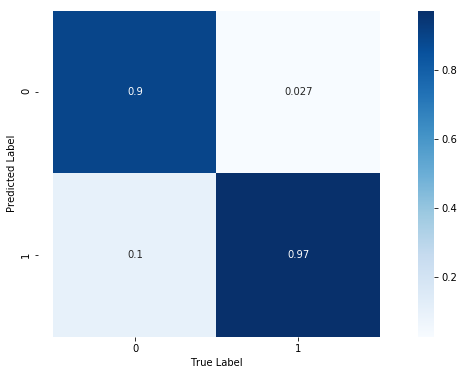

In [41]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train_res, Y_train_res)
Y_pred_test = NBC.predict(X_test)
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)

## D. RandomForestClassifier

In [42]:
X_dup.columns

Index(['term', 'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'open_acc',
       'pub_rec', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'revol_bal',
       'revol_util', 'total_pymnt', 'total_rec_late_fee', 'recoveries',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'ownership_ANY',
       'ownership_MORTGAGE', 'ownership_NONE', 'ownership_OTHER',
       'ownership_OWN', 'ownership_RENT'],
      dtype='object')

Accuracy: 0.9044027008628779


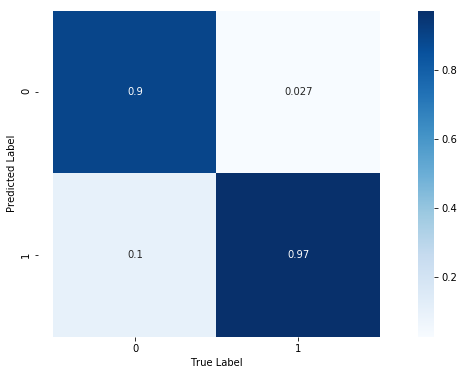

In [43]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_res, Y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#clf.feature_importances_
list(df.columns)
feature_imp = pd.Series(clf.feature_importances_,index=X_dup.columns).sort_values(ascending=False)
feature_imp
CM = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test)
CMatrix(CM)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred=Y_pred_test))

Based on the above importance, I can again drop the columns which contribute less than 1 % 

In [44]:
#tp_unbalset, fp_unbalset = createROC(clf,X_train - np.min(X_train) + 1, Y_train, X_test - np.min(X_test) + 1, Y_test)

In [45]:

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9867348628410575


Computing the ROC curves for the models and finding the true positive and false positive

In [60]:
models = {'NB': GaussianNB(),
          'DT': DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10),
          'LR': LogisticRegression(C=1),
          'RF': RandomForestClassifier(n_estimators=100)}

#models = {'NB': GaussianNB()}


#models = {'NB': GaussianNB()}
unbalset = {}
for i in models.keys():
   # print(i)
   # print(models[i])
   # print(X_train_res)
   # print(np.min(X_train_res))
   # print(Y_train_res)
    scores = cross_val_score(models[i], X_train_res,
                                    Y_train_res, cv=3)
    unbalset[i] = scores
    
print(unbalset)

NB
GaussianNB(priors=None, var_smoothing=1e-09)
        term  loan_amnt  int_rate emp_length  annual_inc  open_acc  pub_rec  \
336529     3       8000     12.99          9     35000.0       5.0      2.0   
66779      6       5000     15.10          5     40000.0       2.0      0.0   
97499      3      12000     19.52         10     60000.0      10.0      0.0   
616314     3       6500     13.99         10     15000.0       9.0      1.0   
199585     6      30225     22.95         10    100000.0       4.0      0.0   
387950     3      10000      6.49          4    125000.0      16.0      0.0   
69065      3      15000      7.62          7    105000.0       9.0      0.0   
247697     6      23875     14.31         10     60000.0       9.0      0.0   
795317     6      20000     15.61         10     89000.0      13.0      0.0   
852698     6      15000      8.67          7     69500.0      15.0      0.0   
404775     6      22000     20.49         10     55000.0      17.0      0.0   
3152

term                     3.00
loan_amnt             1000.00
int_rate                 5.32
emp_length               1.00
annual_inc            8000.00
open_acc                 1.00
pub_rec                  0.00
delinq_2yrs              0.00
dti                      0.00
inq_last_6mths           0.00
revol_bal                0.00
revol_util               0.00
total_pymnt              0.00
total_rec_late_fee       0.00
recoveries               0.00
acc_now_delinq           0.00
tot_coll_amt             0.00
tot_cur_bal              0.00
grade_A                  0.00
grade_B                  0.00
grade_C                  0.00
grade_D                  0.00
grade_E                  0.00
grade_F                  0.00
grade_G                  0.00
ownership_ANY            0.00
ownership_MORTGAGE       0.00
ownership_NONE           0.00
ownership_OTHER          0.00
ownership_OWN            0.00
ownership_RENT           0.00
dtype: float64
336529    0
66779     0
97499     0
616314    0
199585 

term                     3.00
loan_amnt             1000.00
int_rate                 5.32
emp_length               1.00
annual_inc            8000.00
open_acc                 1.00
pub_rec                  0.00
delinq_2yrs              0.00
dti                      0.00
inq_last_6mths           0.00
revol_bal                0.00
revol_util               0.00
total_pymnt              0.00
total_rec_late_fee       0.00
recoveries               0.00
acc_now_delinq           0.00
tot_coll_amt             0.00
tot_cur_bal              0.00
grade_A                  0.00
grade_B                  0.00
grade_C                  0.00
grade_D                  0.00
grade_E                  0.00
grade_F                  0.00
grade_G                  0.00
ownership_ANY            0.00
ownership_MORTGAGE       0.00
ownership_NONE           0.00
ownership_OTHER          0.00
ownership_OWN            0.00
ownership_RENT           0.00
dtype: float64
336529    0
66779     0
97499     0
616314    0
199585 

term                     3.00
loan_amnt             1000.00
int_rate                 5.32
emp_length               1.00
annual_inc            8000.00
open_acc                 1.00
pub_rec                  0.00
delinq_2yrs              0.00
dti                      0.00
inq_last_6mths           0.00
revol_bal                0.00
revol_util               0.00
total_pymnt              0.00
total_rec_late_fee       0.00
recoveries               0.00
acc_now_delinq           0.00
tot_coll_amt             0.00
tot_cur_bal              0.00
grade_A                  0.00
grade_B                  0.00
grade_C                  0.00
grade_D                  0.00
grade_E                  0.00
grade_F                  0.00
grade_G                  0.00
ownership_ANY            0.00
ownership_MORTGAGE       0.00
ownership_NONE           0.00
ownership_OTHER          0.00
ownership_OWN            0.00
ownership_RENT           0.00
dtype: float64
336529    0
66779     0
97499     0
616314    0
199585 

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RF
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
        term  loan_amnt  int_rate emp_length  annual_inc  open_acc  pub_rec  \
336529     3       8000     12.99          9     35000.0       5.0      2.0   
66779      6       5000     15.10          5     40000.0       2.0      0.0   
97499      3      12000     19.52         10     60000.0      10.0      0.0   
616314     3       6500     13.99         10     15000.0       9.0      1.0   
199585     6      30225     22.95         10    100000.0       4.0      0.0   
387950     3      10000      6.4

term                     3.00
loan_amnt             1000.00
int_rate                 5.32
emp_length               1.00
annual_inc            8000.00
open_acc                 1.00
pub_rec                  0.00
delinq_2yrs              0.00
dti                      0.00
inq_last_6mths           0.00
revol_bal                0.00
revol_util               0.00
total_pymnt              0.00
total_rec_late_fee       0.00
recoveries               0.00
acc_now_delinq           0.00
tot_coll_amt             0.00
tot_cur_bal              0.00
grade_A                  0.00
grade_B                  0.00
grade_C                  0.00
grade_D                  0.00
grade_E                  0.00
grade_F                  0.00
grade_G                  0.00
ownership_ANY            0.00
ownership_MORTGAGE       0.00
ownership_NONE           0.00
ownership_OTHER          0.00
ownership_OWN            0.00
ownership_RENT           0.00
dtype: float64
336529    0
66779     0
97499     0
616314    0
199585 

In [61]:
def createROC(models, X, y, Xte, yte):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)
        fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) ##roc_curve function
        #print("FP is:{} and TP is :{}".format(fp,tp))
        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p##returning the true postive and false positive


In [62]:
tp_unbalset, fp_unbalset = createROC(models, X_train_res , Y_train_res, X_test, Y_test)

C:\Users\sarita.machado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
"""
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
#predict = model.predict(X_train)
ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')
"""

"\nfig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))\n#predict = model.predict(X_train)\nax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])\nax.set_ylabel('Classifier')\nax.set_xlabel('Cross-Validation Score')\n\nfor i in range(0, len(tp_unbalset)):\n    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)\n\naxes[1].plot([0, 1], [0, 1], '--k', lw=1)\naxes[1].legend(models.keys())\naxes[1].set_ylabel('True Positive Rate')\naxes[1].set_xlabel('False Positive Rate')\naxes[1].set_xlim(0,1)\naxes[1].set_ylim(0,1)\n\ncm = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test).T\ncm = cm.astype('float')/cm.sum(axis=0)\n\nax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);\nax.set_xlabel('True Value')\nax.set_ylabel('Predicted Value')\nax.axis('equal')\n"

In [64]:
"""
for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)
"""



"\nfor i in range(0, len(tp_unbalset)):\n    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)\n\naxes[1].plot([0, 1], [0, 1], '--k', lw=1)\naxes[1].legend(models.keys())\naxes[1].set_ylabel('True Positive Rate')\naxes[1].set_xlabel('False Positive Rate')\naxes[1].set_xlim(0,1)\naxes[1].set_ylim(0,1)\n"

"\n\n#cm = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test).T\n#cm = cm.astype('float')/cm.sum(axis=0)\n\n#ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);\n#ax.set_xlabel('True Value')\n#ax.set_ylabel('Predicted Value')3\n#ax.axis('equal')\n"

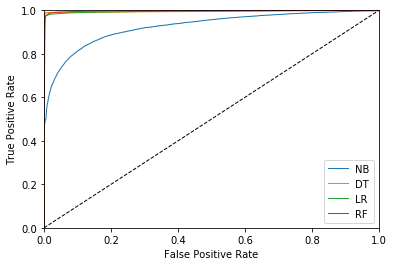

In [65]:


#predict = model.predict(X_train)
#ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
#ax.set_ylabel('Classifier')
#ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
      plt.plot(fp_unbalset[i], tp_unbalset[i], lw=1)
#plt.plot(fp_unbalset, tp_unbalset, lw=1)

    
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.legend(models.keys())
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)


"""

#cm = confusion_matrix(y_pred=Y_pred_test, y_true=Y_test).T
#cm = cm.astype('float')/cm.sum(axis=0)

#ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
#ax.set_xlabel('True Value')
#ax.set_ylabel('Predicted Value')3
#ax.axis('equal')
"""